In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into a pandas DataFrame
data = pd.read_csv('ELECTROL BOND DONORS.csv')

In [3]:
# Display the first few rows of the DataFrame to understand its structure
print(data.head())

  Date of Purchase       Purchaser Name  Denomination  Unnamed: 3
0      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
1      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
2      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
3      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
4      12/Apr/2019  A B C INDIA LIMITED        100000         NaN


In [4]:
# Summary statistics
summary_statistics = data.describe()

pd.set_option('display.float_format', '{:.2f}'.format)

print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
       Denomination  Unnamed: 3
count      18871.00        0.00
mean     6441372.05         NaN
std      4538946.88         NaN
min         1000.00         NaN
25%      1000000.00         NaN
50%     10000000.00         NaN
75%     10000000.00         NaN
max     10000000.00         NaN


In [5]:
# Count the number of purchases by purchaser name
purchases_by_purchaser = data['Purchaser Name'].value_counts()
print("\nPurchases by Purchaser:")
print(purchases_by_purchaser)


Purchases by Purchaser:
Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1208
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     821
QWIKSUPPLYCHAINPRIVATELIMITED                      410
HALDIA ENERGY LIMITED                              395
VEDANTA LIMITED                                    386
                                                  ... 
MR. SAMEER BHATIA                                    1
B.DAS AND ASSOCIATES PVT. LTD.                       1
J B ENTERPRISE                                       1
RAYALA SEEMA WIND ENERGY PVT LTD                     1
GORUKANTI SURENDER RAO                               1
Name: count, Length: 1316, dtype: int64


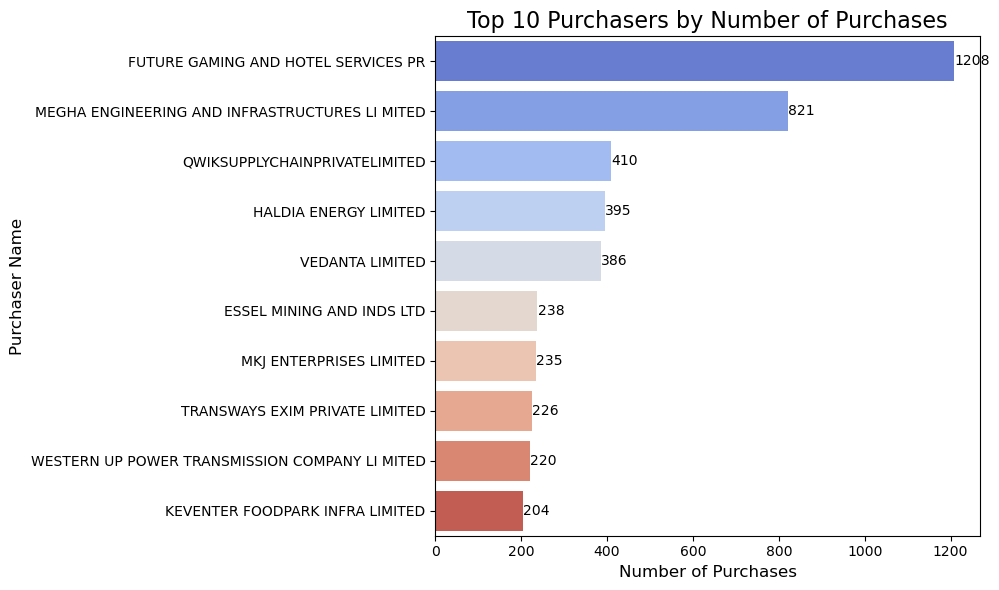

In [6]:
# Visualization of the top 10 bond purchasers by quantity of bonds:

top_10_purchasers = purchases_by_purchaser.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 10 purchasers
ax = sns.barplot(x=top_10_purchasers.values, y=top_10_purchasers.index, palette='coolwarm')

# Customize the plot
plt.title('Top 10 Purchasers by Number of Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Purchaser Name', fontsize=12)

# Add data labels on the bars
for index, value in enumerate(top_10_purchasers.values):
    ax.text(value + 0.1, index, f'{value}', va='center', ha='left', fontsize=10, color='black')  # Position and format

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
# Total value of the bonds purchased
total_bonds_purchased = data['Denomination'].sum()
formatted_total = f"₹ {total_bonds_purchased:,}"

print("\nTotal Value of the Bonds Purchased:", formatted_total)


Total Value of the Bonds Purchased: ₹ 121,555,132,000


In [8]:
# Analyze trends over time (assuming 'Date of Purchase' is in a datetime format)
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['Year'] = data['Date of Purchase'].dt.year
data['Month'] = data['Date of Purchase'].dt.month

In [9]:
# Number of purchases per year
purchases_by_year = data['Year'].value_counts().sort_index()
print("\nPurchases by Year:")
print(purchases_by_year)


Purchases by Year:
Year
2019    3154
2020     460
2021    2647
2022    5314
2023    6399
2024     897
Name: count, dtype: int64


In [10]:
# Number of purchases per month
purchases_by_month = data.groupby(['Year', 'Month']).size()
print("\nPurchases by Month:")
print(purchases_by_month)


Purchases by Month:
Year  Month
2019  4        1335
      5        1187
      7         101
      10        531
2020  1         139
      10        321
2021  1         151
      4         974
      7         465
      10       1057
2022  1        2068
      4         811
      7         480
      10        741
      11        954
      12        260
2023  1         437
      4        1470
      7        1371
      10       2012
      11       1109
2024  1         897
dtype: int64


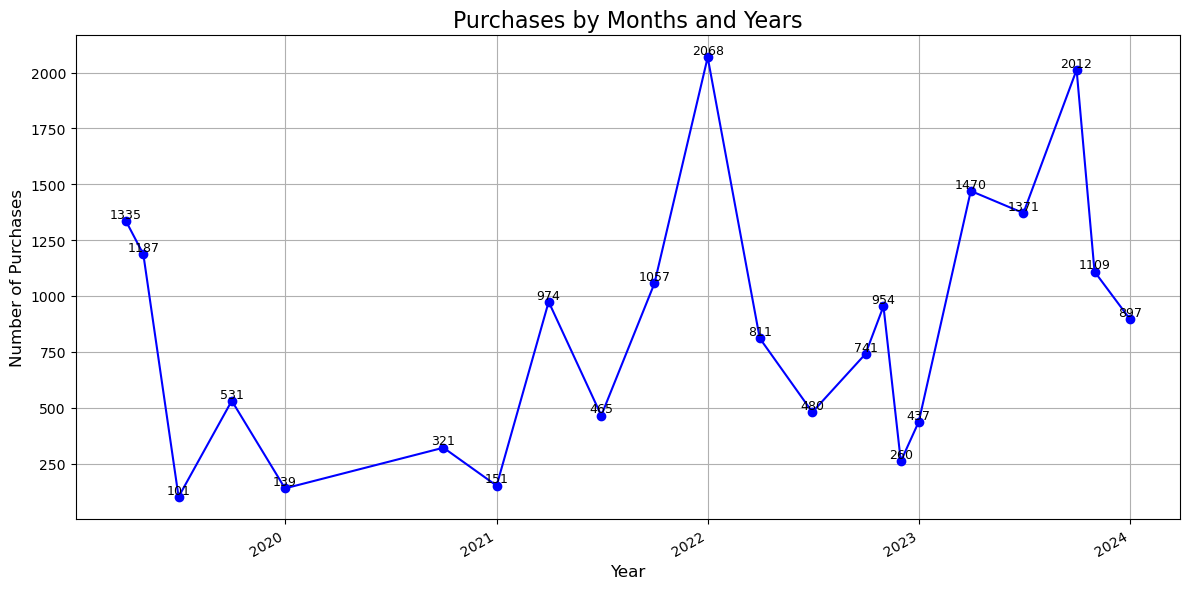

In [11]:
# Visualization of Number of Purchases of Months by Months and Years :

purchases_by_month_df = purchases_by_month.reset_index(name='Count')

purchases_by_month_df['Date'] = pd.to_datetime(purchases_by_month_df[['Year', 'Month']].assign(Day=1))

purchases_by_month_df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(purchases_by_month_df.index, purchases_by_month_df['Count'], marker='o', linestyle='-', color='b')

plt.title('Purchases by Months and Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.gcf().autofmt_xdate()  

for x, y in zip(purchases_by_month_df.index, purchases_by_month_df['Count']):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9, color='black')  # Increased the offset

plt.grid()

plt.tight_layout()
plt.show()


In [12]:
# Top 10 Purchasers by Value 

purchases_by_purchaser = data.groupby('Purchaser Name')['Denomination'].sum()
top_10_purchasers = purchases_by_purchaser.nlargest(10)
top_10_purchasers_formatted = top_10_purchasers.apply(lambda x: f"₹ {x:,}")

print(top_10_purchasers_formatted)

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               ₹ 12,080,000,000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     ₹ 8,210,000,000
QWIKSUPPLYCHAINPRIVATELIMITED                      ₹ 4,100,000,000
HALDIA ENERGY LIMITED                              ₹ 3,770,000,000
VEDANTA LIMITED                                    ₹ 3,756,500,000
ESSEL MINING AND INDS LTD                          ₹ 2,245,000,000
WESTERN UP POWER TRANSMISSION COMPANY LI MITED     ₹ 2,200,000,000
KEVENTER FOODPARK INFRA LIMITED                    ₹ 1,950,000,000
MADANLAL LTD.                                      ₹ 1,855,000,000
BHARTI AIRTEL LIMITED                              ₹ 1,830,000,000
Name: Denomination, dtype: object


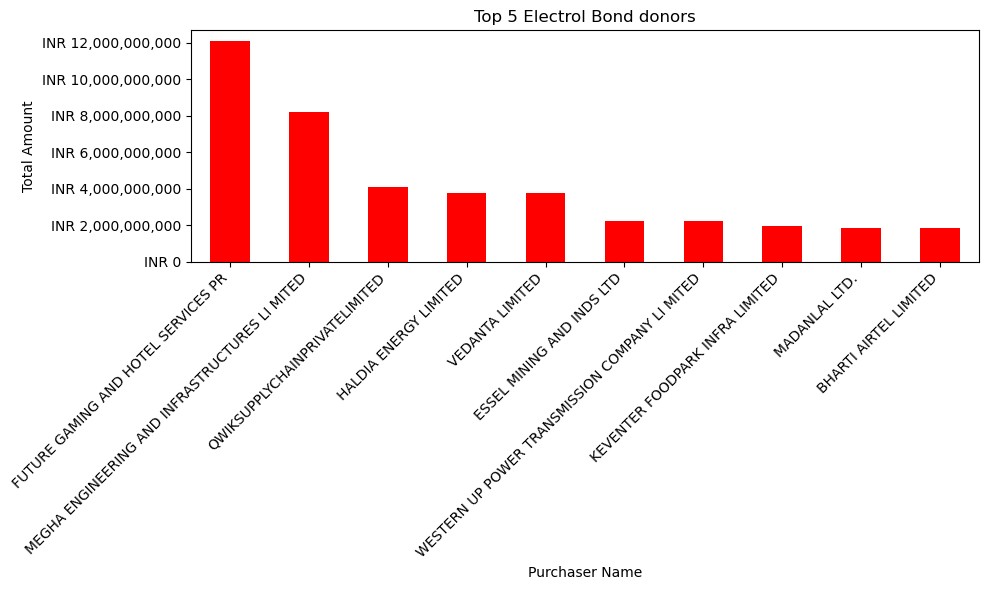

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
ax = top_10_purchasers.plot(kind='bar', color='red')
plt.title('Top 5 Electrol Bond donors')
plt.xlabel('Purchaser Name')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

# Adding amount scale
formatter = FuncFormatter(lambda x, _: 'INR {:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [14]:
# Load the data into a pandas DataFrame

data_donations = pd.read_csv('PARTY-WISE ELECTROL BOND DONATION.csv')

In [15]:
# Display the first few rows of the DataFrame to understand its structure

print(data_donations.head())

  Date of\nEncashment               Name of the Political Party  Denomination  \
0         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
1         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
2         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000   
3         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
4         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [16]:
# Summary statistics

summary_statistics = data_donations.describe()

pd.set_option('display.float_format', '{:.2f}'.format)

print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
       Denomination  Unnamed: 3
count      20421.00        0.00
mean     6252920.67         NaN
std      4576321.21         NaN
min         1000.00         NaN
25%      1000000.00         NaN
50%     10000000.00         NaN
75%     10000000.00         NaN
max     10000000.00         NaN


In [17]:
# Number of Bonds Donated to each Political Party

donations_by_party = data_donations['Name of the Political Party'].value_counts()
print("\PARTY-WISE ELECTROL BOND DONATION :")
print(donations_by_party)

\PARTY-WISE ELECTROL BOND DONATION :
Name of the Political Party
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39


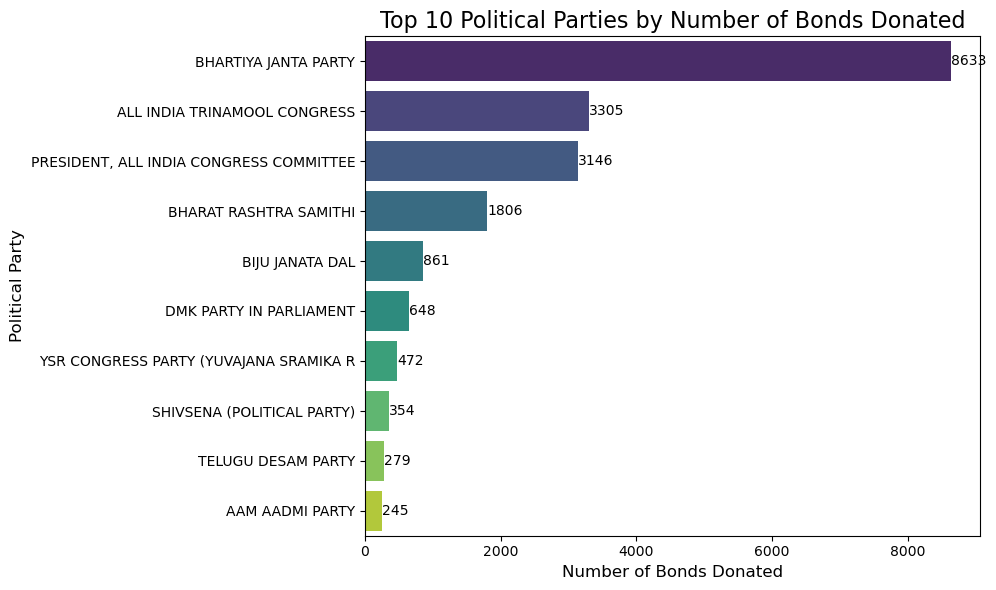

In [18]:
# Visualisation of Top 10 Political Parties by Number of Bonds Donated

top_10_donations_by_party = donations_by_party.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x=top_10_donations_by_party.values, y=top_10_donations_by_party.index, palette='viridis')

# Customize the plot
plt.title('Top 10 Political Parties by Number of Bonds Donated', fontsize=16)
plt.xlabel('Number of Bonds Donated', fontsize=12)
plt.ylabel('Political Party', fontsize=12)

# Add data labels on the bars
for index, value in enumerate(top_10_donations_by_party.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
# Top 10 Parties by Total Value of Donations 

amount_of_donations_by_party = data_donations.groupby('Name of the Political Party')['Denomination'].sum()

top_10_donations_by_party = amount_of_donations_by_party.nlargest(10)

def format_in_crores(amount):
    return f'₹ {amount / 10**7:,.2f} Cr'  

top_10_donations_by_party_formatted = top_10_donations_by_party.apply(format_in_crores)

print(top_10_donations_by_party_formatted)


Name of the Political Party
BHARTIYA JANTA PARTY                       ₹ 6,060.51 Cr
ALL INDIA TRINAMOOL CONGRESS               ₹ 1,609.53 Cr
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    ₹ 1,421.87 Cr
BHARAT RASHTRA SAMITHI                     ₹ 1,214.71 Cr
BIJU JANATA DAL                              ₹ 775.50 Cr
DMK PARTY IN PARLIAMENT                      ₹ 639.00 Cr
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R       ₹ 337.00 Cr
TELUGU DESAM PARTY                           ₹ 218.88 Cr
SHIVSENA (POLITICAL PARTY)                   ₹ 158.38 Cr
RASTRIYA JANTA DAL                            ₹ 72.50 Cr
Name: Denomination, dtype: object


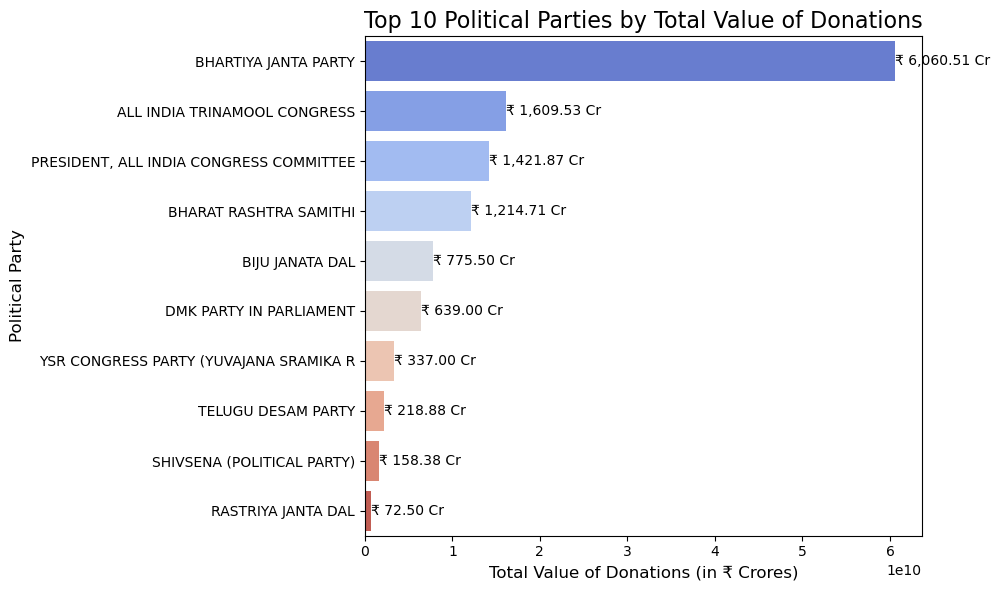

In [20]:
# Visualization of Top 10 Parties by Total Value of Donations 

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_10_donations_by_party.values, y=top_10_donations_by_party.index, palette='coolwarm')

plt.title('Top 10 Political Parties by Total Value of Donations', fontsize=16)
plt.xlabel('Total Value of Donations (in ₹ Crores)', fontsize=12)
plt.ylabel('Political Party', fontsize=12)

for index, value in enumerate(top_10_donations_by_party.values):
    ax.text(value + 0.1, index, format_in_crores(value), va='center', ha='left', fontsize=10, color='black')  # Position and format

plt.tight_layout()
plt.show()